# Task 5: Unsupervised analysis

#### In this notebook we'll try to detect the natural number of clusters for the clustering methods that require as input the number of clusters.
#### To achieve that we'll experimenting on two algorithms:
1. K-means
1. Hierahical Clustering (single-linkage)

#### To detect the natural number of clusters we'll use the following methods:
1. K-Means
 1. Intra-cluster variance plot (using the elbow method)
 1. Sillouette Width 
1. Hierahical Clustering (single-linkage)
 1. Clusters dendograms
 1. Sillouette Width
 

##### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

##### Load the data

In [2]:
data_files_with_separators = [
    ('./data/smile.csv', ','),
    ('./data/2d-10c.dat', ' '),
    ('./data/square.data', ' '),
    ('./data/long.data', ' '),
    ('./data/order2-3clust.csv', ',')
]

data = dict()
for file_name, separator in data_files_with_separators:
    df = pd.read_csv(file_name, sep=separator, header=None)

    data[file_name] = {
        'number_of_classes': len(df[2].unique()),
        'data': df
    }

##### Util methods

In [3]:
def plot_original_data(data, axs, title):
    # Original data plot
    sns.scatterplot(
        x=0,
        y=1,
        data=data, 
        hue=2,
        ax=axs
    )
    axs.set_title(title)

def plot_kmeans_clustering(data, axs, title):
    clustering = KMeans(n_clusters=data['number_of_classes'], random_state=0).fit(data['data'][[0, 1]])

    clustered_data = data['data'].copy()
    clustered_data[2] = clustering.labels_
    g = sns.scatterplot(
        x=0,
        y=1,
        data=clustered_data, 
        hue=2, 
        ax=axs
    )
    axs.set_title(title)
    
def plot_kmeans_clustering_score(data, max_number_of_clusters, axs):
    score = [KMeans(n_clusters=i, random_state=0)
                 .fit(data['data'][[0, 1]])
                 .score(data['data'][[0, 1]]) 
             for i in range(2, max_number_of_clusters)
            ]
    
    axs.plot(range(2, max_number_of_clusters), score)
    axs.set_xlabel('Number of Clusters')
    axs.set_ylabel('Score')
    axs.axvline(x=data['number_of_classes'], color='k', linestyle='--', alpha=0.3)
    axs.text(data['number_of_classes'] + 0.2, np.mean(score),'Real number of clusters', rotation=90)
    axs.set_title('Elbow Curve')
    
def plot_hierarhical_cluster(raw_data, linkage, n_clusters, ax):
    clustering = AgglomerativeClustering(
        linkage=linkage, 
        n_clusters=n_clusters
    ).fit(raw_data['data'][[0, 1]])
    
    clustered_data = raw_data['data'].copy()
    clustered_data[2] = clustering.labels_
    g = sns.scatterplot(
        x=0,
        y=1,
        data=clustered_data, 
        hue=2, 
        ax=ax
    )
    ax.set_title(file_name + " - " + linkage + " linkage")
    
def plot_silhouette_score_kmeans(data, max_number_of_clusters, axs):
    score = [silhouette_score(data['data'][[0, 1]], KMeans(n_clusters=i, random_state=0)
             .fit(data['data'][[0, 1]])
             .labels_)
         for i in range(2, max_number_of_clusters)
        ]
    
    axs.plot(range(2, max_number_of_clusters), score)
    axs.set_xlabel('Number of Clusters')
    axs.set_ylabel('Silhouette score')
    axs.axvline(x=raw_data['number_of_classes'], color='k', linestyle='--', alpha=0.3)
    axs.text(raw_data['number_of_classes'] + 0.2, np.mean(score),'Real number of clusters', rotation=90)
    axs.set_title('Silhouette score')
    
def plot_silhouette_score_hierarhical(data, max_number_of_clusters, linkage, axs):
    score = [silhouette_score(data['data'][[0, 1]], AgglomerativeClustering(linkage=linkage, n_clusters=i)
             .fit(data['data'][[0, 1]])
             .labels_)
         for i in range(2, max_number_of_clusters)
        ]
    
    axs.plot(range(2, max_number_of_clusters), score)
    axs.set_xlabel('Number of Clusters')
    axs.set_ylabel('Silhouette score')
    axs.axvline(x=raw_data['number_of_classes'], color='k', linestyle='--', alpha=0.3)
    axs.text(raw_data['number_of_classes'] + 0.2, np.mean(score),'Real number of clusters', rotation=90)
    axs.set_title('Silhouette score')
    

### K-Means analysis

##### Intra-cluster variance plots

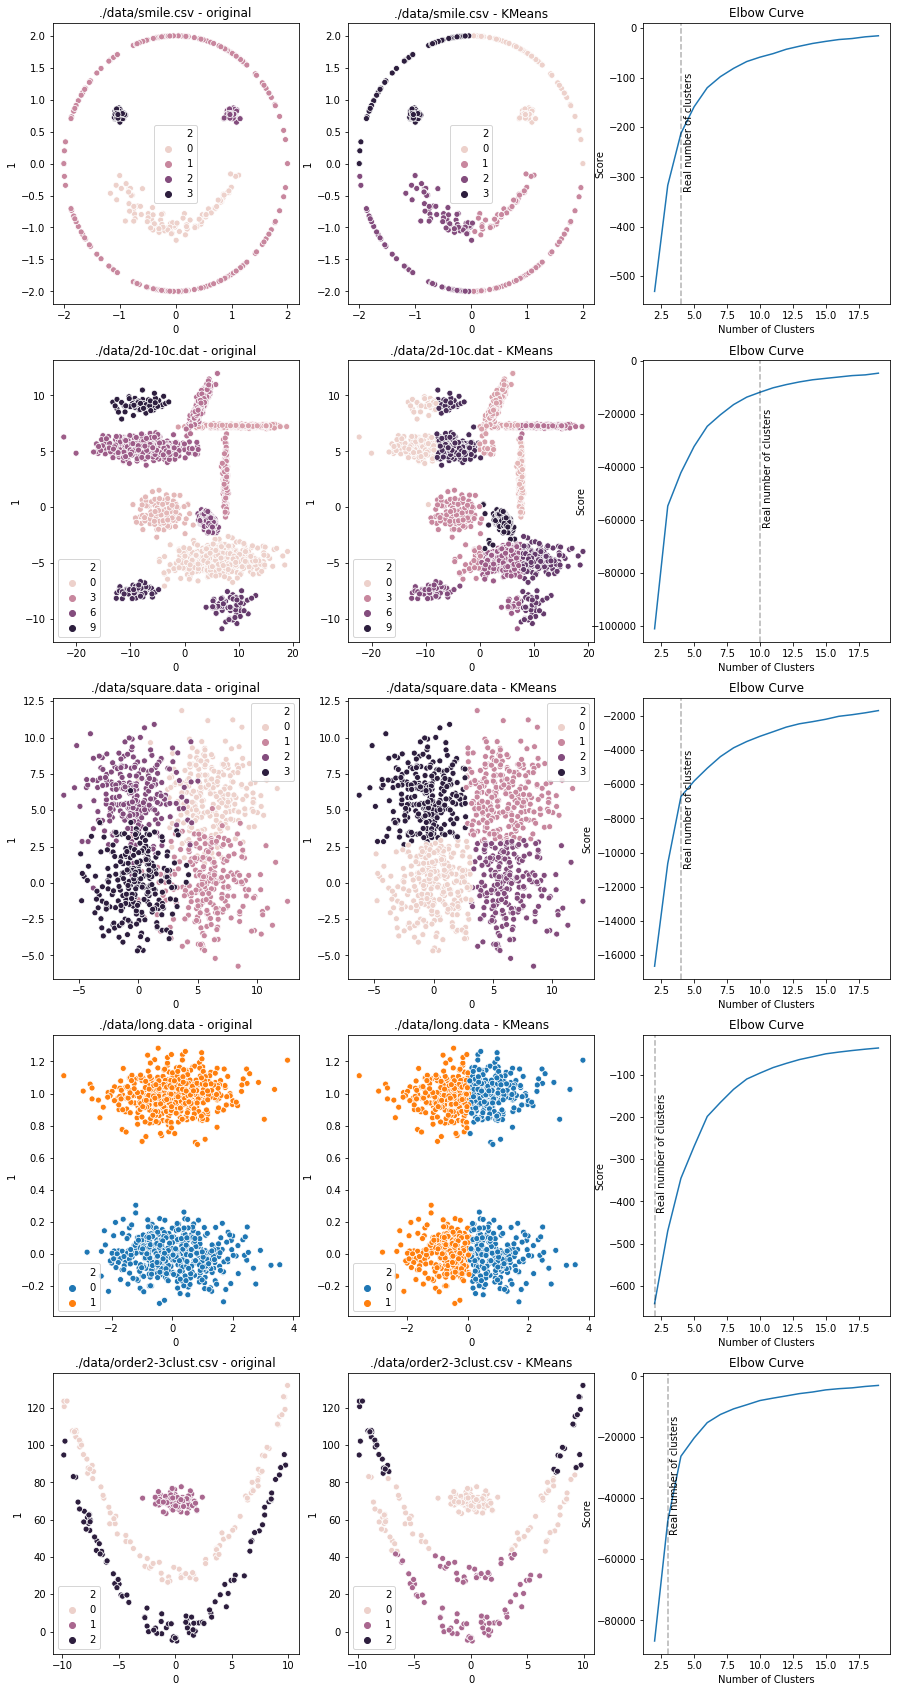

In [4]:
fig, axs = plt.subplots(nrows=len(data_files_with_separators), ncols=3, figsize=(15, 30))

max_number_of_clusters = 20

idx = 0
for file_name, raw_data in data.items():
    # Original data plot
    plot_original_data(raw_data['data'], axs[idx][0], file_name + " - original")
    
     # K-Means clustering
    plot_kmeans_clustering(raw_data, axs[idx][1], file_name + " - KMeans")
    
    # K-Means clustering scores
    plot_kmeans_clustering_score(raw_data, max_number_of_clusters, axs[idx][2])
    
    idx += 1

###### Sillouette Width

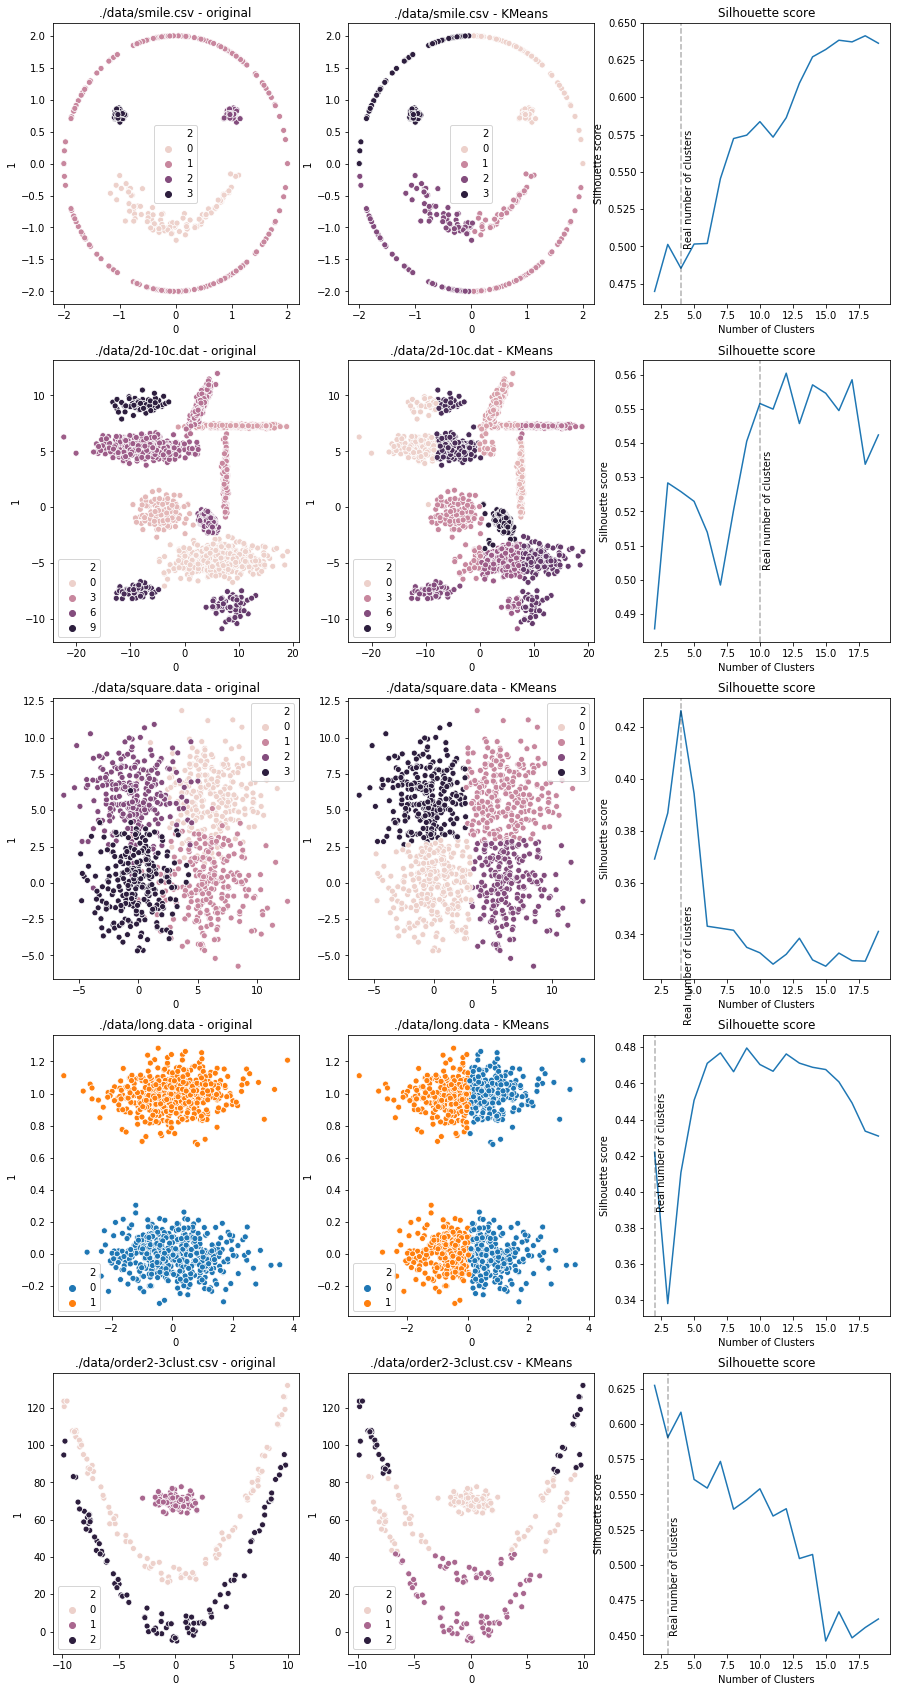

In [5]:
fig, axs = plt.subplots(nrows=len(data_files_with_separators), ncols=3, figsize=(15, 30))

max_number_of_clusters = 20

idx = 0
for file_name, raw_data in data.items():
    # Original data plot
    plot_original_data(raw_data['data'], axs[idx][0], file_name + " - original")
    
     # K-Means clustering
    plot_kmeans_clustering(raw_data, axs[idx][1], file_name + " - KMeans")
    
    # K-Means silhouette_score
    plot_silhouette_score_kmeans(raw_data, max_number_of_clusters, axs[idx][2])
    
    idx += 1

### Hierahical Clustering (single-linkage) analysis

##### Dendograms plots

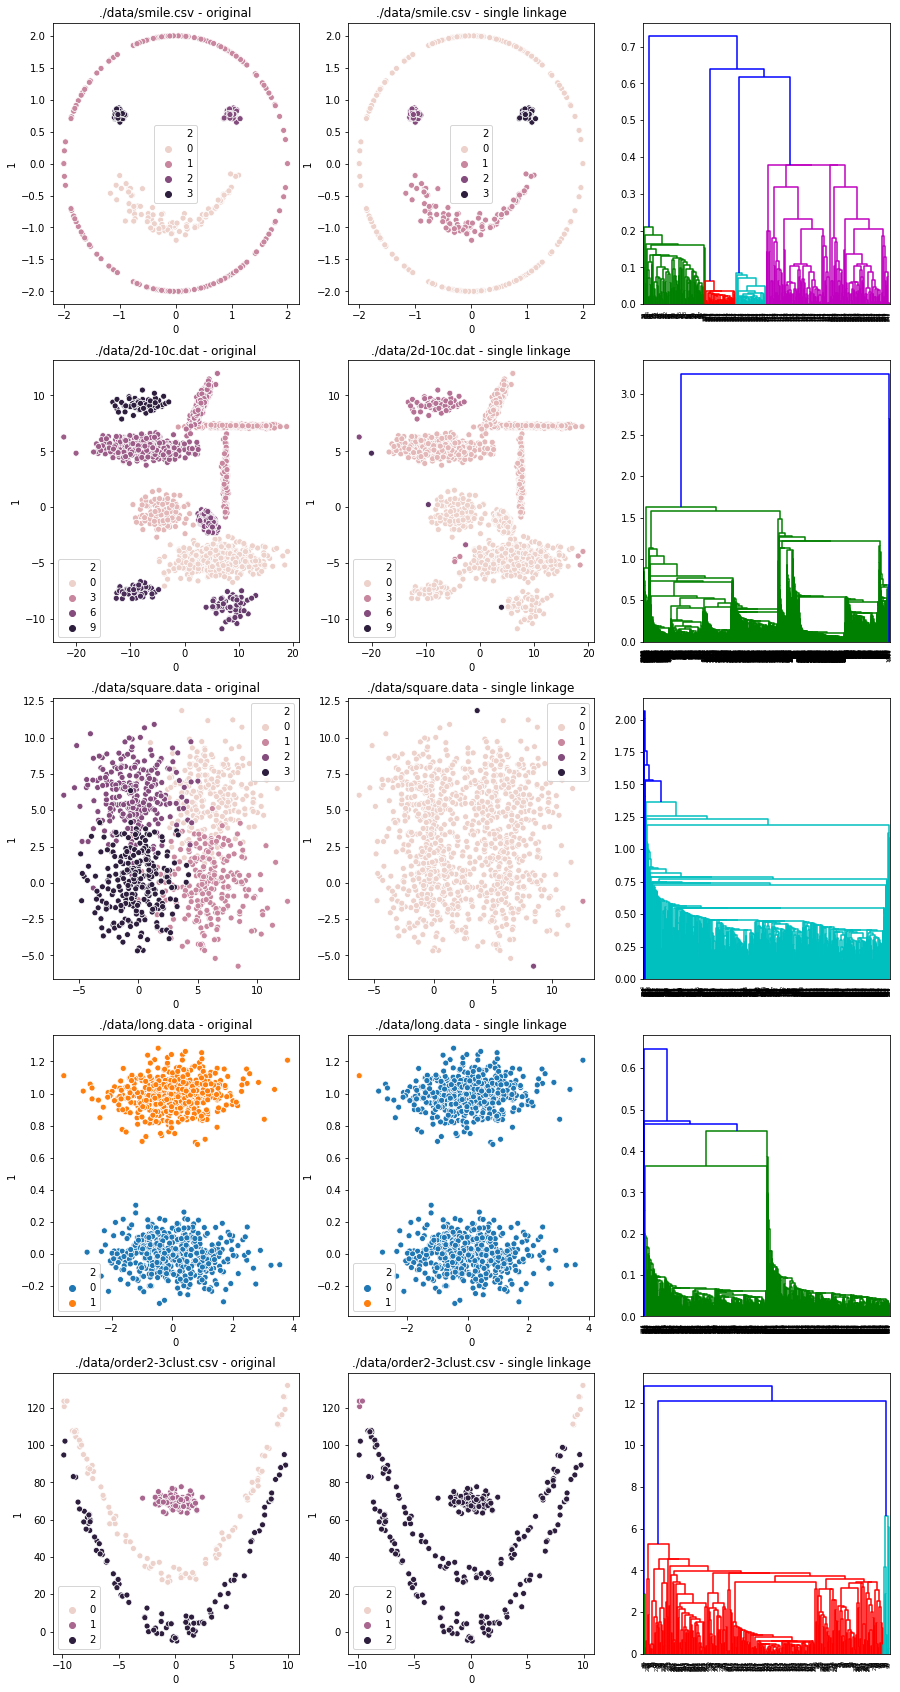

In [6]:
fig, axs = plt.subplots(nrows=len(data_files_with_separators), ncols=3, figsize=(15, 30))

max_number_of_clusters = 20

idx = 0
for file_name, raw_data in data.items():
    # Original data plot
    plot_original_data(raw_data['data'], axs[idx][0], file_name + " - original")
    
    # Hierarchical clustering single-linkage
    plot_hierarhical_cluster(raw_data, 'single', raw_data['number_of_classes'], axs[idx][1])
    
    # Hierarchical clustering dendograms
    Z = linkage(raw_data['data'][[0, 1]])
    dendrogram(Z, ax=axs[idx][2])  
    
    idx += 1

###### Sillouette Width

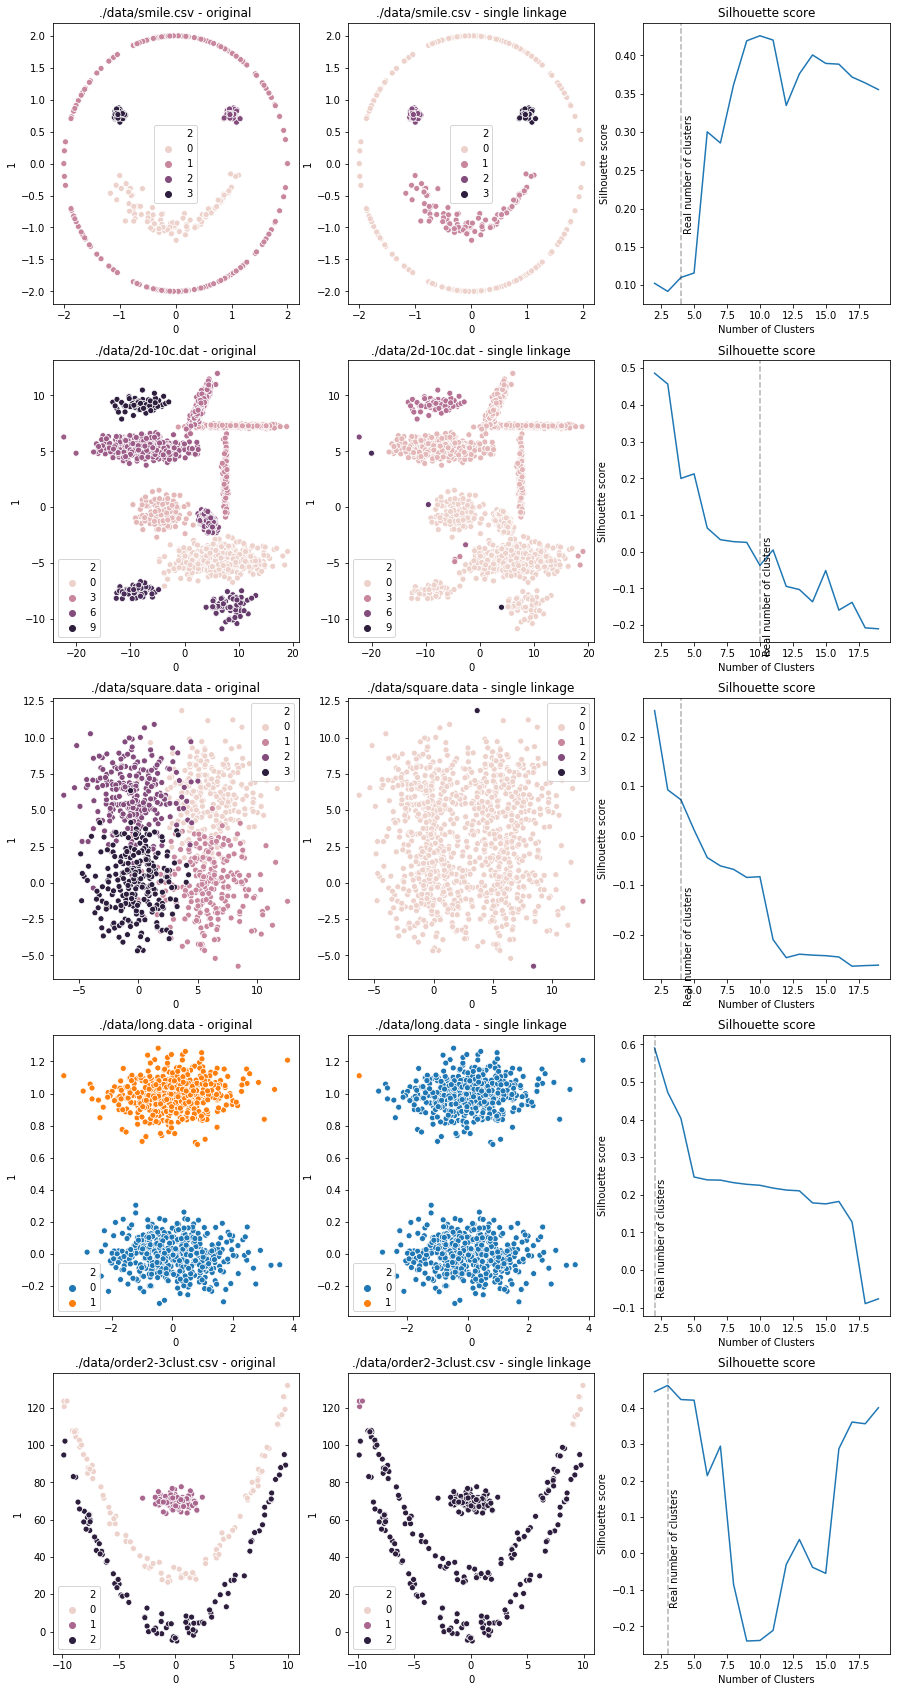

In [7]:
fig, axs = plt.subplots(nrows=len(data_files_with_separators), ncols=3, figsize=(15, 30))

max_number_of_clusters = 20

idx = 0
for file_name, raw_data in data.items():
    # Original data plot
    plot_original_data(raw_data['data'], axs[idx][0], file_name + " - original")
    
    # Hierarchical clustering single-linkage
    plot_hierarhical_cluster(raw_data, 'single', raw_data['number_of_classes'], axs[idx][1])
    
    # Hierarchical clustering silhouette_score
    plot_silhouette_score_hierarhical(raw_data, max_number_of_clusters, 'single', axs[idx][2])
    
    idx += 1